In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [20]:
path="weatherhistory.xlsx"
df=pd.read_excel(path)
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.


In [21]:
df.shape

(96453, 12)

In [22]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [23]:
df.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [24]:
df=df.drop(['Temperature (C)','Precip Type','Wind Bearing (degrees)','Visibility (km)','Pressure (millibars)','Daily Summary',
            'Wind Speed (km/h)'],axis=1)
df.head()

,Formatted Date,Summary,Apparent Temperature (C),Humidity,Loud Cover
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,7.388889,0.89,0
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,7.227778,0.86,0
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,9.377778,0.89,0
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,5.944444,0.83,0
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,6.977778,0.83,0


In [25]:
df.isnull().sum()

Formatted Date              0
Summary                     0
Apparent Temperature (C)    0
Humidity                    0
Loud Cover                  0
dtype: int64

In [26]:
df.dtypes

Formatted Date               object
Summary                      object
Apparent Temperature (C)    float64
Humidity                    float64
Loud Cover                    int64
dtype: object

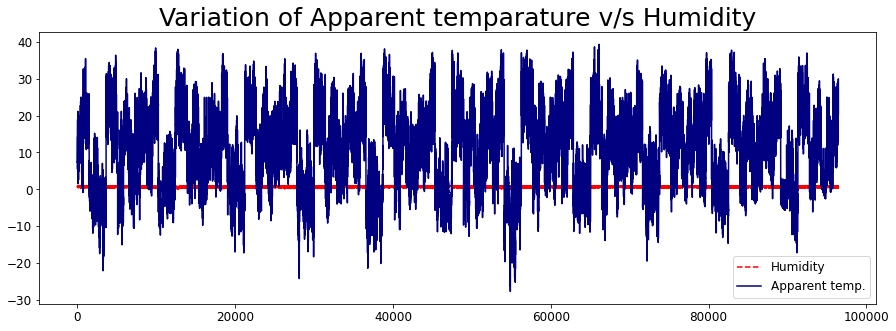

In [27]:
plt.figure(figsize=(15,5));
plt.plot(df['Humidity'], label = 'Humidity', color = 'red',linestyle='dashed');
plt.plot(df['Apparent Temperature (C)'], label = 'Apparent temp.',color = 'navy');
plt.title('Variation of Apparent temparature v/s Humidity', fontsize= 25);
plt.legend(loc = 0, fontsize = 12);
plt.xticks(fontsize = 12);
plt.yticks(fontsize = 12);

In [28]:
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'],utc=True)
df = df.set_index('Formatted Date')
df_monthly_mean= df[['Apparent Temperature (C)','Humidity']].resample('MS').mean()
df_monthly_mean

,Apparent Temperature (C),Humidity
Formatted Date,,
2005-12-01 00:00:00+00:00,-4.050000,0.890000
2006-01-01 00:00:00+00:00,-4.173708,0.834610
2006-02-01 00:00:00+00:00,-2.990716,0.843467
2006-03-01 00:00:00+00:00,1.969780,0.778737
2006-04-01 00:00:00+00:00,12.098827,0.728625
...,...,...
2016-08-01 00:00:00+00:00,21.383094,0.674046
2016-09-01 00:00:00+00:00,18.355833,0.688833
2016-10-01 00:00:00+00:00,8.923947,0.799906


<AxesSubplot:title={'center':'Variation in Apparent Temperature and Humidity with time'}, xlabel='Formatted Date'>

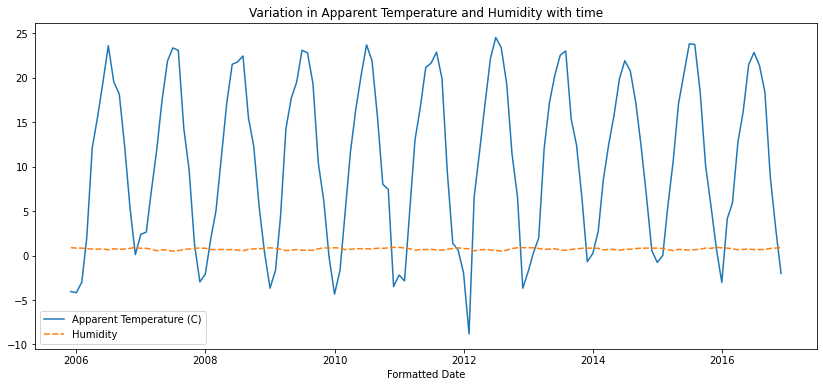

In [29]:

plt.figure(figsize=(14,6))
plt.title("Variation in Apparent Temperature and Humidity with time")
sns.lineplot(data=df_monthly_mean)

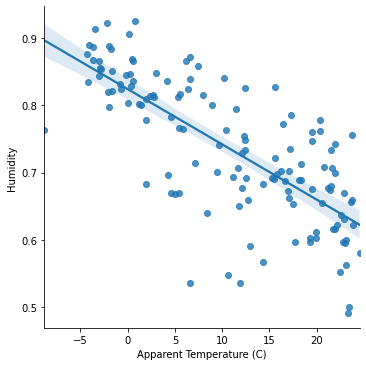

In [30]:
sns.lmplot(x='Apparent Temperature (C)',y='Humidity',data=df_monthly_mean)
plt.show()

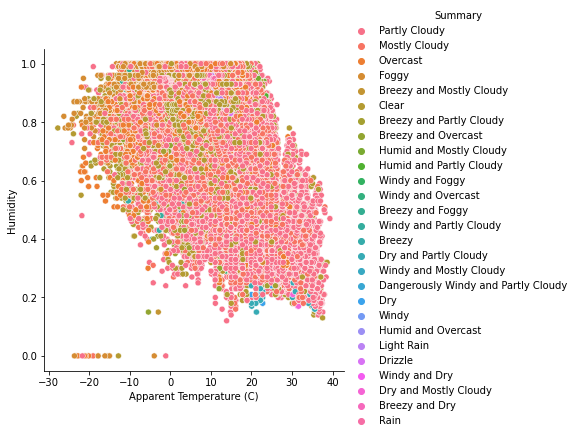

In [31]:
sns.relplot(data=df,x="Apparent Temperature (C)",y="Humidity",color="purple",hue="Summary")

In [32]:
df['Summary'].value_counts()

Partly Cloudy                          31733
Mostly Cloudy                          28094
Overcast                               16597
Clear                                  10890
Foggy                                   7148
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Breezy and Foggy                          35
Windy and Mostly Cloudy                   35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Humid and 

In [33]:
df2 = df_monthly_mean[df_monthly_mean.index.month==2]
df3 = df_monthly_mean[df_monthly_mean.index.month==3]
df4 = df_monthly_mean[df_monthly_mean.index.month==4]
df5 = df_monthly_mean[df_monthly_mean.index.month==5]
df6 = df_monthly_mean[df_monthly_mean.index.month==6]
df7 = df_monthly_mean[df_monthly_mean.index.month==7]
df8 = df_monthly_mean[df_monthly_mean.index.month==8]
df9 = df_monthly_mean[df_monthly_mean.index.month==9]
df10 = df_monthly_mean[df_monthly_mean.index.month==10]
df11 = df_monthly_mean[df_monthly_mean.index.month==11]
df12 = df_monthly_mean[df_monthly_mean.index.month==12]

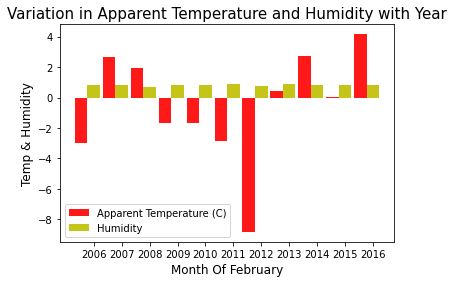

In [34]:
df2 = df_monthly_mean[df_monthly_mean.index.month==2]
n_groups = 11
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.45
opacity = 0.9

rects1 = plt.bar(index, df2['Apparent Temperature (C)'], bar_width,alpha=opacity,color='r',label='Apparent Temperature (C)')
rects2 = plt.bar(index + bar_width, df2['Humidity'], bar_width,alpha=opacity,color='y',label='Humidity')
plt.rcParams["figure.figsize"] = (14,6)
plt.xlabel('Month Of February',fontsize=12)
plt.ylabel('Temp & Humidity',fontsize=12)
plt.title('Variation in Apparent Temperature and Humidity with Year',fontsize=15)
plt.xticks(index + bar_width, ('2006', '2007', '2008', '2009','2010','2011','2012','2013','2014','2015','2016'))
plt.legend()
plt.show()

In [35]:
df_test=df[['Summary','Apparent Temperature (C)']]
df_grp=df_test.groupby(['Summary'],as_index=False).mean()
df_grp

,Summary,Apparent Temperature (C)
0,Breezy,3.387654
1,Breezy and Dry,21.111111
2,Breezy and Foggy,-7.403492
3,Breezy and Mostly Cloudy,8.680588
4,Breezy and Overcast,3.492235
5,Breezy and Partly Cloudy,9.989349
6,Clear,11.040338
7,Dangerously Windy and Partly Cloudy,3.483333
8,Drizzle,10.011681
9,Dry,28.273529


In [36]:
df['Summary'].value_counts()

Partly Cloudy                          31733
Mostly Cloudy                          28094
Overcast                               16597
Clear                                  10890
Foggy                                   7148
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Breezy and Foggy                          35
Windy and Mostly Cloudy                   35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Humid and 

Text(0, 0.5, 'Humidity')

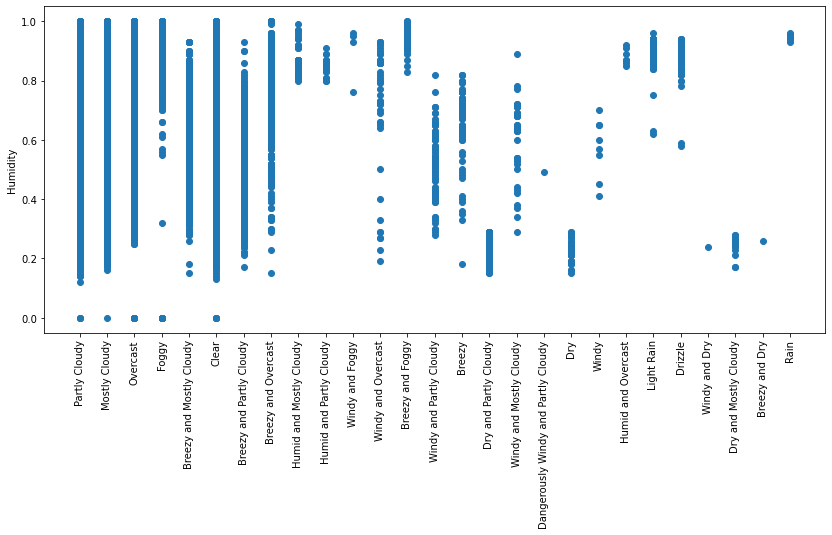

In [37]:
plt.figure(figsize=(14,6))
plt.scatter(df['Summary'],df['Humidity'])
plt.xticks(rotation=90)
plt.ylabel('Humidity')

Text(0.5, 1.0, 'Apparent Temperature vs Wind Speed for the month of May')

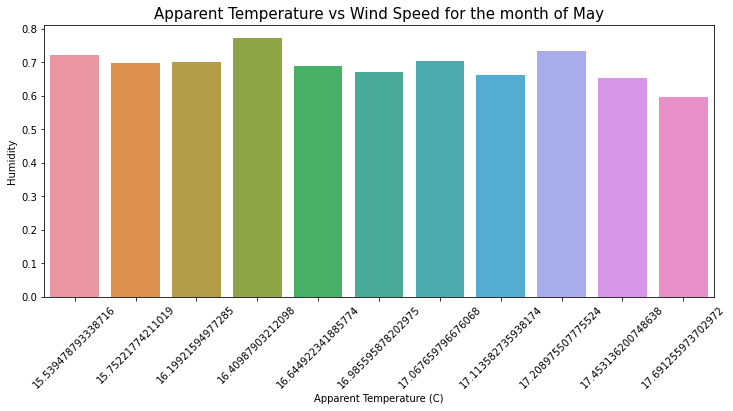

In [39]:
plt.figure(figsize=(12,5))
sns.barplot(x='Apparent Temperature (C)', y='Humidity', data=df5)
plt.xticks(rotation=45)
plt.title('Apparent Temperature vs Wind Speed for the month of May',fontsize=15)

In [40]:
data_columns1 = ['Apparent Temperature (C)','Humidity']
df_monthly_mean1 = df[data_columns1].resample('MS').mean()
dfdec = df_monthly_mean1[df_monthly_mean1.index.month==12]

<AxesSubplot:title={'center':'Variation in Apparent Temperature and Humidity with time(December)'}, xlabel='Formatted Date'>

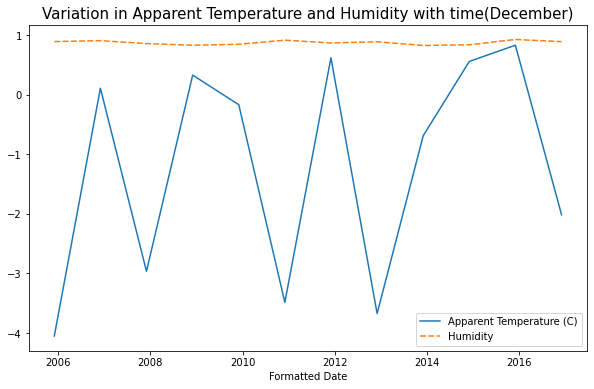

In [41]:
plt.figure(figsize=(10,6))
plt.title("Variation in Apparent Temperature and Humidity with time(December)",fontsize=15)
sns.lineplot(data=df12)